# Explore here

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif, SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from pickle import dump


SipSp= Siblings/Spouses Aboard
Parch= Parents/Children Aboard
Fare= precio del boleto


In [2]:
#CARGAR DATOS
train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/titanic_train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/titanic_test.csv")
test_survived_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/gender_submission.csv")
test_data["Survived"] = test_survived_data["Survived"]

total_data = pd.concat([train_data, test_data]).reset_index(inplace = False)
total_data.drop(columns = ["index"], inplace = True)
total_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
total_data.shape

(1309, 12)

In [4]:
total_data.isna().sum()


PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

El num de cabina falta en lamayoria de los datos y la edad en el 16% de los datos 

In [5]:
total_data.nunique()

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

In [6]:
total_data.duplicated().sum()

np.int64(0)

In [7]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [8]:
total_data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1, inplace = True)
total_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


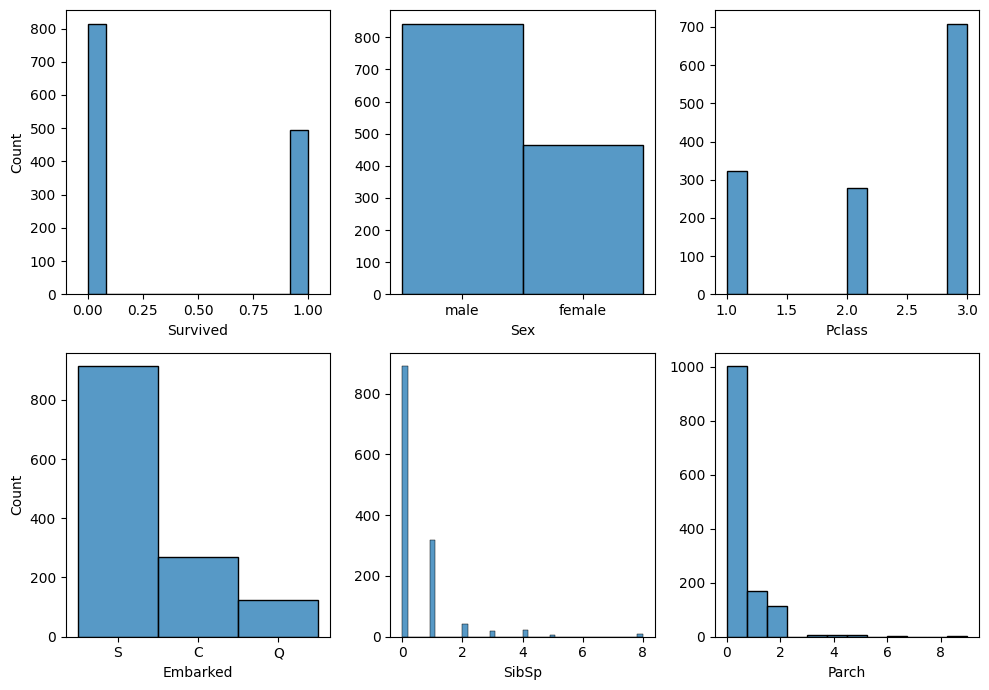

In [9]:
#PLOTEAR
#DATOS CUALITATIVOS O DISCRETOS 
fig, axis = plt.subplots(2, 3, figsize = (10, 7))

# Crear un histograma múltiple
sns.histplot(ax = axis[0, 0], data = total_data, x = "Survived").set_xlim(-0.1, 1.1)
sns.histplot(ax = axis[0, 1], data = total_data, x = "Sex").set(ylabel = None)
sns.histplot(ax = axis[0, 2], data = total_data, x = "Pclass").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = total_data, x = "Embarked")
sns.histplot(ax = axis[1, 1], data = total_data, x = "SibSp").set(ylabel = None)
sns.histplot(ax = axis[1, 2], data = total_data, x = "Parch").set(ylabel = None)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Hubieron más muertos que supervivientes, más hombres que mujeres a bordo. La mayoría iba en 3 clase y entre 1 y 2 clase no había grandes diferencias, la mayoría salío desde "S" e iban sin familia a bordo. 

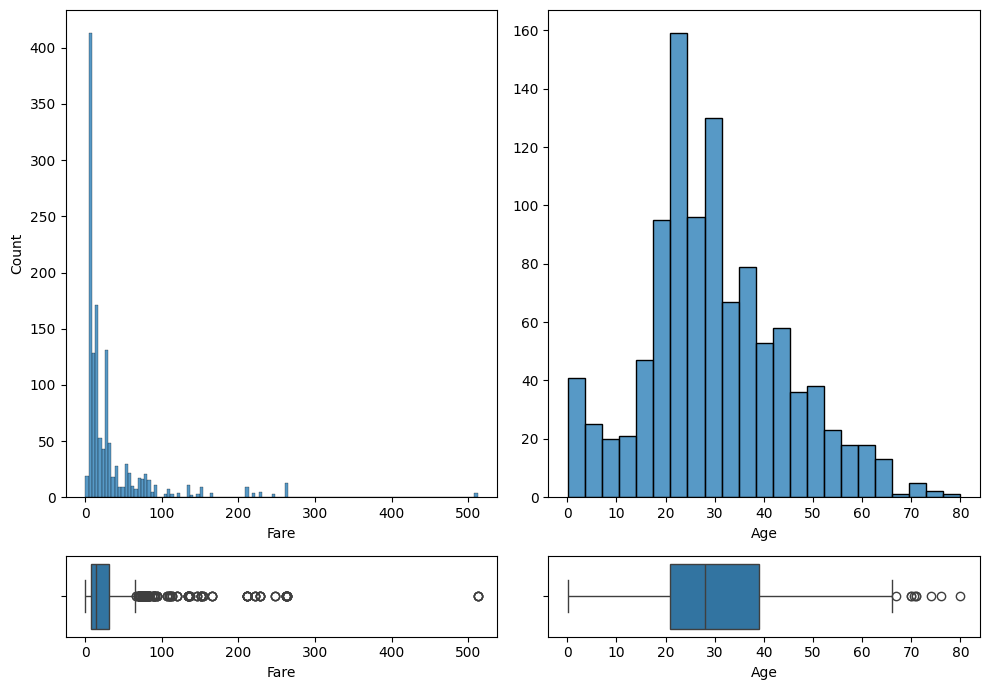

In [10]:
#DATOS CUANTITATIVOS 

fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_data, x = "Fare").set(xlabel = "Fare")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "Fare")
sns.histplot(ax = axis[0, 1], data = total_data, x = "Age").set(xlabel = "Age", ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "Age")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Fare presenta una destribución desigual con bastantes outlyiers
La edad presenta una distridución más normal pero con outliyers hacía la derecha 
La mayoría de gente a bordo tenía entre 20 y 40 años

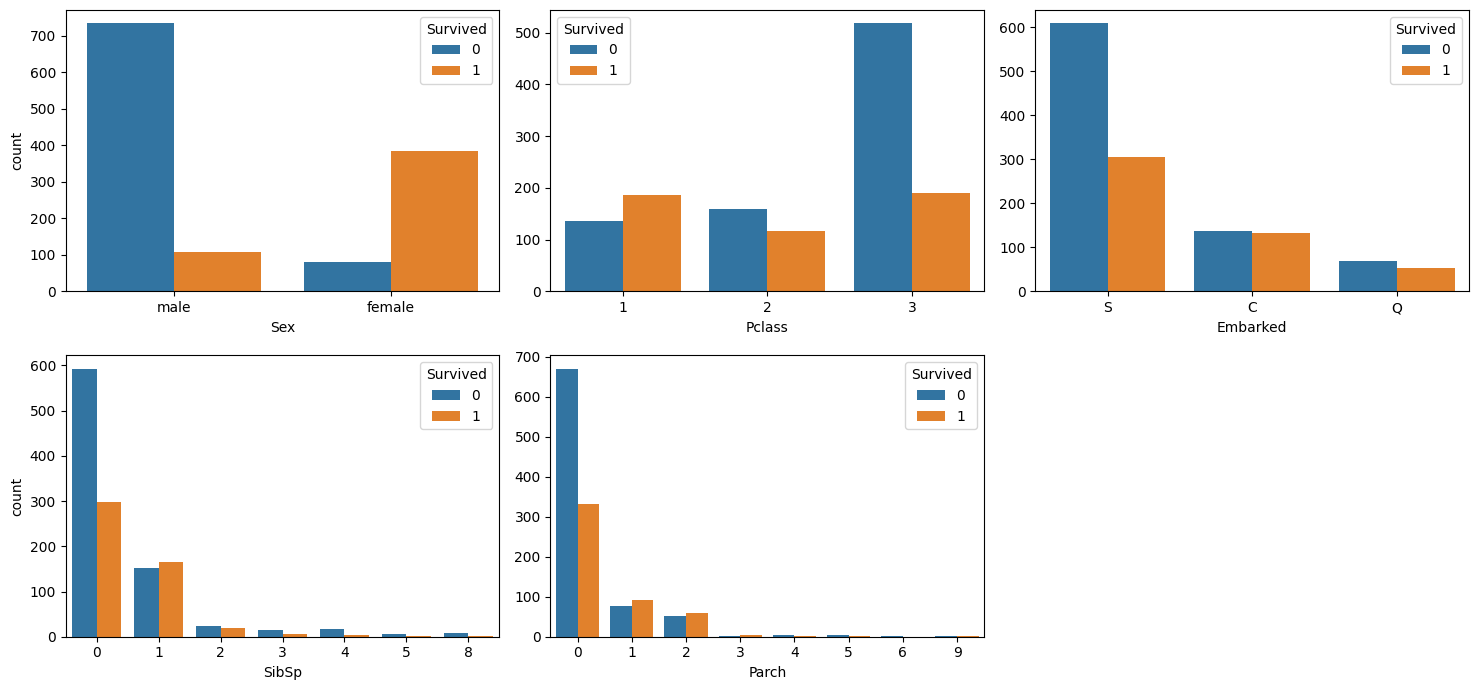

In [11]:
#ESTUDIO DE LAS VARIABLES CON RESPECTO A LA SUPERVIVENCIA 

fig, axis = plt.subplots(2, 3, figsize = (15, 7))

sns.countplot(ax = axis[0, 0], data = total_data, x = "Sex", hue = "Survived")
sns.countplot(ax = axis[0, 1], data = total_data, x = "Pclass", hue = "Survived").set(ylabel = None)
sns.countplot(ax = axis[0, 2], data = total_data, x = "Embarked", hue = "Survived").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = total_data, x = "SibSp", hue = "Survived")
sns.countplot(ax = axis[1, 1], data = total_data, x = "Parch", hue = "Survived").set(ylabel = None)

plt.tight_layout()
fig.delaxes(axis[1, 2])

plt.show()

Las mujeres se salvaron en su mayoría, lo mismo ocurrió con los que viajaban en primera clase, con los que viajaban con una pareja o hermano y con los que viajaban con 1 o 2 familiares de primer grado (padres e hijos).
Es curioso que los que embarcaron en el puerto C sobreviviesen casi los mismos que muriesen

In [12]:
#CONVERTIR CUALITATIVA EN CUANTITATIVA
total_data["Sex_n"] = pd.factorize(total_data["Sex"])[0]
total_data["Embarked_n"] = pd.factorize(total_data["Embarked"])[0]

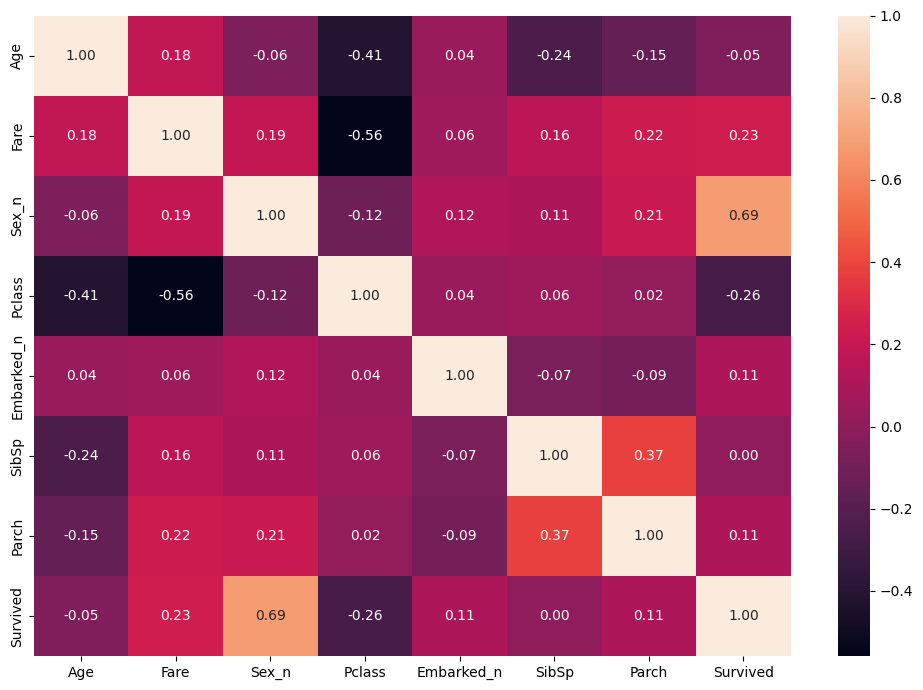

In [13]:
#MAPA DE CALOR 
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(total_data[["Age", "Fare", "Sex_n", "Pclass", "Embarked_n", "SibSp", "Parch", "Survived"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Respecto a la superviviencia, las variables que parecen estar más relacionadas son el sexo (0.79), seguido de PClass( -0.26), la relación es negativa porque los que salen "beneficiados" son los de 1 clase, y Fare (0.23)

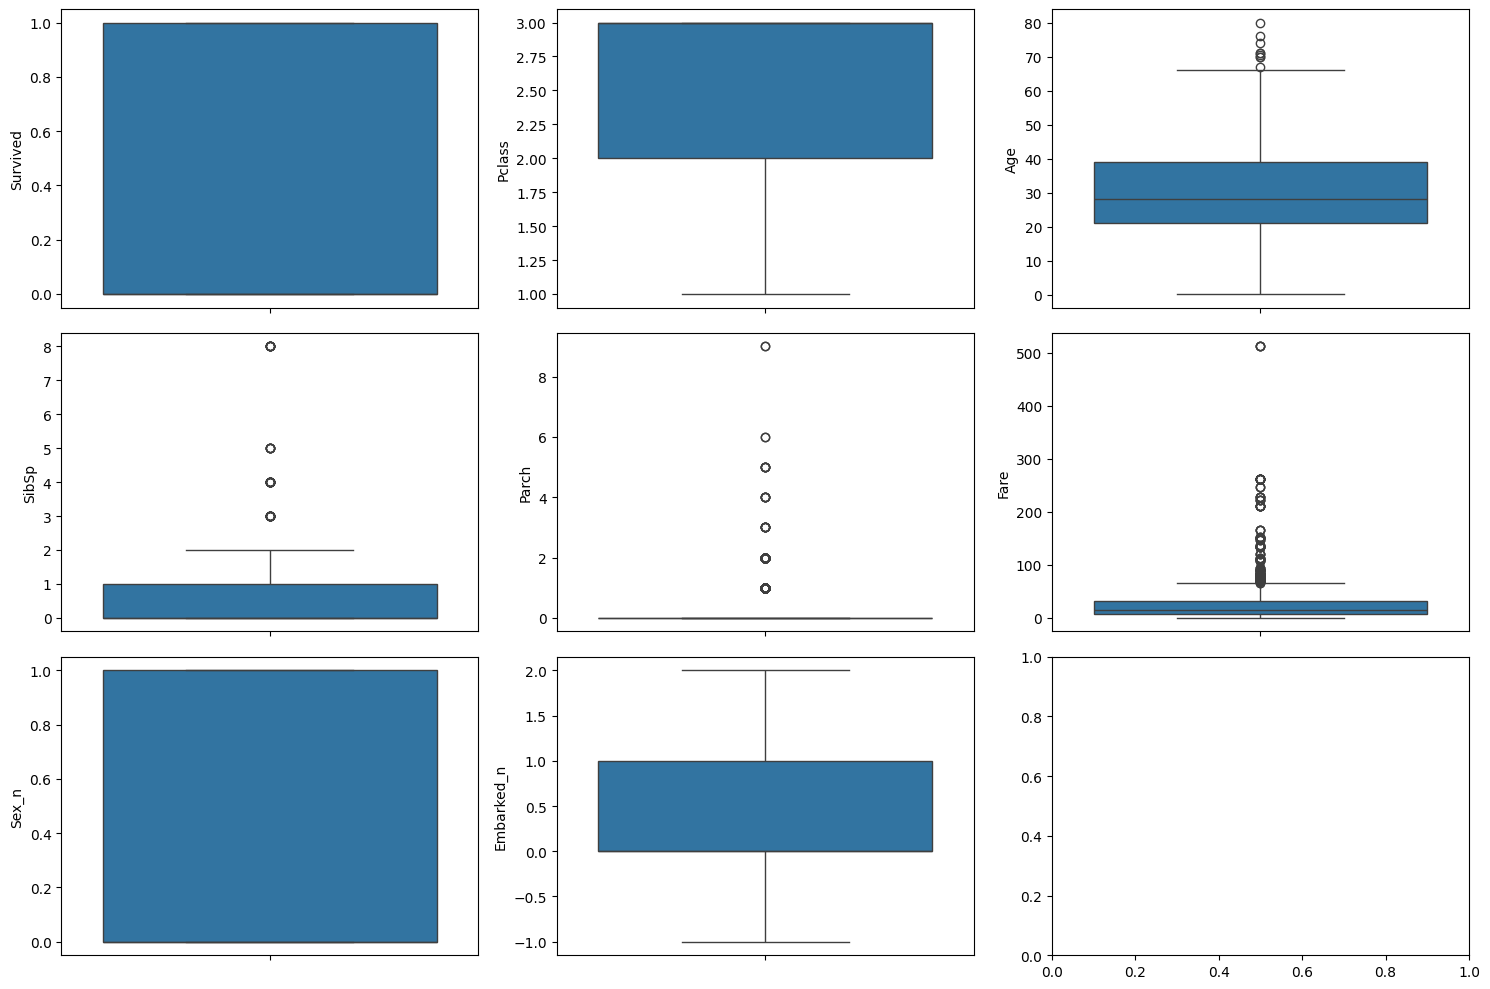

In [14]:
#TRATAMIENTO DE OUTLIYERS 
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "Survived")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "Pclass")
sns.boxplot(ax = axis[0, 2], data = total_data, y = "Age")
sns.boxplot(ax = axis[1, 0], data = total_data, y = "SibSp")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "Parch")
sns.boxplot(ax = axis[1, 2], data = total_data, y = "Fare")
sns.boxplot(ax = axis[2, 0], data = total_data, y = "Sex_n")
sns.boxplot(ax = axis[2, 1], data = total_data, y = "Embarked_n")

plt.tight_layout()

plt.show()

Hay varias variables con outliyers pero la que más me preocupa es Fare, ya que tiene un peso relativo en la estimación de superviviencia 

In [15]:
fare_stats = total_data["Fare"].describe()
fare_stats

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [16]:
total_data[total_data["Fare"] > 100].shape

count_survivors = total_data[(total_data["Fare"] > 100) & (total_data["Survived"] == 1)].shape[0]
print(f"Sobreviven {count_survivors} de {total_data[total_data["Fare"] > 100].shape[0]}")
print((58/84)*100)

Sobreviven 58 de 84
69.04761904761905


In [17]:

count_survivors = total_data[(total_data["Fare"] > 200) & (total_data["Survived"] == 1)].shape[0]
print(f"Sobreviven {count_survivors} de {total_data[total_data["Fare"] > 200].shape[0]}")
print((26/38)*100)

Sobreviven 26 de 38
68.42105263157895


In [18]:
count_survivors = total_data[(total_data["Fare"] > 250) & (total_data["Survived"] == 1)].shape[0]
print(f"Sobreviven {count_survivors} de {total_data[total_data["Fare"] > 250].shape[0]}")
print((13/17)*100)

Sobreviven 13 de 17
76.47058823529412


Pese al desequilibrio de datos en Fare, la mayoría de los valores outliyers sobrevivien así que no voy a quitarlos 

In [19]:
#PREPARACIÓN DEL DATASET

total_data["Age"] = total_data["Age"].fillna(total_data["Age"].median())
total_data["Embarked"] = total_data["Embarked"].fillna(total_data["Embarked"].mode()[0])
total_data["Fare"] = total_data["Fare"].fillna(total_data["Fare"].mean())

In [20]:
# TRAIN Y TEST 
num_variables = ["Pclass", "Age", "Fare", "Sex_n", "Embarked_n", "SibSp", "Parch"]

# Dividimos el conjunto de datos en muestras de train y test
X = total_data.drop("Survived", axis = 1)[num_variables]
y = total_data["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Pclass,Age,Fare,Sex_n,Embarked_n,SibSp,Parch
772,2,57.0,10.500,1,0,0,0
543,2,32.0,26.000,0,0,1,0
289,3,22.0,7.750,1,2,0,0
10,3,4.0,16.700,1,0,1,1
147,3,9.0,34.375,1,0,2,2


In [21]:
X_test.head()

,Pclass,Age,Fare,Sex_n,Embarked_n,SibSp,Parch
1148,3,28.0,8.050,0,0,0,0
1049,1,42.0,26.550,0,0,0,0
982,3,28.0,7.775,0,0,0,0
808,2,39.0,13.000,0,0,0,0
1195,3,28.0,7.750,1,2,0,0


In [22]:
#NORMALIZACIÓN
scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()

,Pclass,Age,Fare,Sex_n,Embarked_n,SibSp,Parch
772,-0.331309,2.160657,-0.467908,1.355507,-0.586065,-0.489239,-0.429655
543,-0.331309,0.190910,-0.150474,-0.737732,-0.586065,0.442095,-0.429655
289,0.852582,-0.596989,-0.524227,1.355507,2.536631,-0.489239,-0.429655
10,0.852582,-2.015207,-0.340935,1.355507,-0.586065,0.442095,0.720854
147,0.852582,-1.621257,0.021043,1.355507,-0.586065,1.373429,1.871363


In [23]:
#IMPLEMENTACIÓN DEL MODELO 
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.851145038167939


In [27]:
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    'max_iter': [100, 200, 500, 1000]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [100, 200, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [28]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

Mejores hiperparámetros: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [29]:
#OPTIMIZACIÓN DEL MODELO 
model_op = LogisticRegression(C= 0.1, max_iter= 100, penalty= "l1", solver= 'liblinear')
model_op.fit(X_train, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [30]:
y_pred = model_op.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8435114503816794


In [32]:
dump(model_op, open("/workspace/ML-Flask/models/modelo_reg_log", "wb"))